In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

----

## Measures of Spread

### Range

$R = max(x) - min(x)$

*Doesn't really say much*

----

### Interquartile Range
*Is the range of the middle 50%*
> How to calculate
> - Find the median of a data set
> - Find the medians of the 2 divided groups
> - Your higher median minus the lower median is the IQR

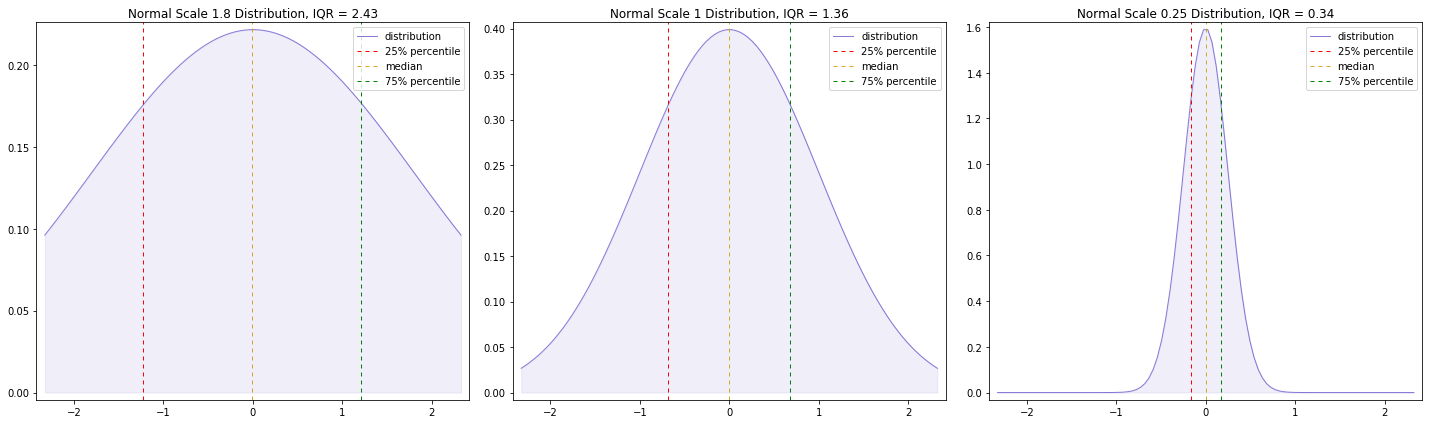

In [19]:
np.random.seed(1000) # Fix the seed so figures are consistent when generated

def plot_dist(s, plt, title="Distribution"):
    # percent point function
    x = np.linspace(stats.norm.ppf(0.01, 0), stats.norm.ppf(0.99, 0), 100)

    # probability density function
    y = stats.norm.pdf(x, scale=s) 

    # random variates - produce random variables that fit this distribution
    r = stats.norm.rvs(scale=s,  size=50000)

    x_percentile25 = np.percentile(r, 25)
    x_median = np.median(r)
    x_percentile75 = np.percentile(r, 75)
    iqr = x_percentile75 - x_percentile25
    
    plt.title(title + ', IQR = ' + '{:0.2f}'.format(iqr))
    plt.plot(x, y, color='slateblue', lw=1, alpha=0.8, label='distribution')
    plt.fill_between(x, y, alpha=0.1, color='slateblue')
    plt.axvline(x_percentile25, color='red', linestyle='dashed', dashes=(4,4), linewidth=1, label="25% percentile")
    plt.axvline(x_median, color='goldenrod', linestyle='dashed', dashes=(4,4), linewidth=1, label="median")
    plt.axvline(x_percentile75, color='green', linestyle='dashed', dashes=(4,4), linewidth=1, label="75% percentile")
    plt.margins(0.02, 0.02)
    plt.subplots_adjust(bottom=0.002)
    plt.tight_layout()
    plt.legend()
    
plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
plot_dist(1.8, plt, 'Normal Scale 1.8 Distribution')

plt.subplot(1, 3, 2)
plot_dist(1, plt, 'Normal Scale 1 Distribution')

plt.subplot(1, 3, 3)
plot_dist(0.25, plt, 'Normal Scale 0.25 Distribution')
    
plt.show();

----

## Variance & Standard Deviation

### Variance
*Measure of 'variability', is measured in the point unit squared *

$\displaystyle V(X) = \frac{1}{n-1} \cdot \sum_{i=1}^{n} |\bar{x} - x_i|^2 $ <br/>
*( $\bar{x}$ is the 'mean' )*

### Standard Deviation
*The average amount we expect a point to differ/deviate from the mean, measured in the point unit* <br/>
$\displaystyle SD(X) = \sqrt{V(X)} = \Big( \frac{1}{n-1} \cdot \sum_{i=1}^{n} |\bar{x} - x_i|^2 \Big)^{\frac{1}{2}}$ <br/>
*( $\bar{x}$ is the 'mean' )*


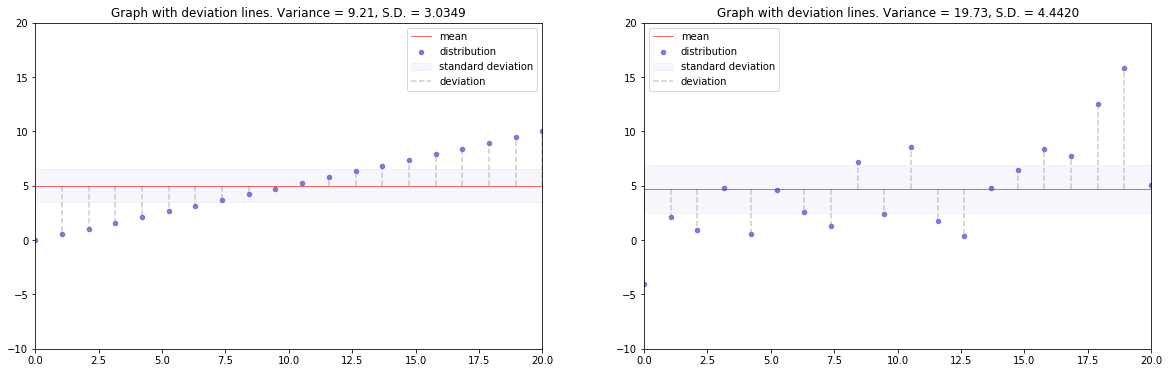

In [25]:
np.random.seed(1000) # Fix the seed so figures are consistent when generated

x = np.linspace(0, 20,20)
y1 = (x * 0.5) 
y2 = y1 + (np.random.normal(0, size=(20)) * 5.0)

def plot_variance(x,y, plt):
    y_mean = np.mean(y)
    variance = np.var(y)
    #sd = np.sqrt(variance)
    sd = np.std(y)
    plt.margins(0,0)
    plt.title("Graph with deviation lines. Variance = {:0.2f}, S.D. = {:0.4f}".format(variance, sd) )
    plt.scatter(x, y, color='slateblue', s=20, lw=1, alpha=0.8, label='distribution')
    plt.axhline(y_mean, color='red', lw=1, alpha=0.6, label='mean')
    plt.fill_between(x,y_mean-(sd/2.0), y_mean+(sd/2.0), color='slateblue',alpha=0.05, label='standard deviation' )
    plt.vlines(x=x, ymin=y_mean, ymax=y, color='grey', linestyle='dashed', alpha=0.4, label='deviation')
    plt.ylim((-10,20.0))
    plt.legend()

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plot_variance(x,y1, plt)

plt.subplot(1,2,2)
plot_variance(x,y2, plt)
    
plt.show()

----

## References
- [Youtube - CrashCourse - Statistics - Measures of Spread][1]

 [1]: https://www.youtube.com/watch?v=R4yfNi_8Kqw&index=5&list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr

### Distributions

Normal
> Roughly same amount of data on either side of the middle
> Middle has most common values around it
> Bell shape curve